# CASE ANÁLISE DE DADOS COMPLETO

Nesse case irei abordar ,com o auxílio da biblioteca Pandas e outras gráficas, um case de análise de dados completo. As seguintes perguntas serão respondidas para uma análise mais profunda do negócio.

#### Pergunta 1: Qual foi o melhor mês de vendas? Quanto foi ganho?

#### Pergunta 2: Qual cidade teve o maior número de vendas?

#### Pergunta 3: Qual foi o produto mais vendido, e o mais rentável?

#### Pergunta 4: Em que momento deve-se executar os anúncios para maximizar as vendas?

Essas 4 perguntas irão trazer uma análie mais profunda do negócio, e de como tomar deciões de negócios

#### Importando pandas

In [3]:
import pandas as pd
import os

#### Task 1: Juntar 12 arquivos de venda em um único arquivo CSV

Primeiro vamos fazer um teste se o loop está lendo todos os arquivos presentes na pasta

In [4]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv", sep=",")


files = [file for file in os.listdir("./Sales_Data")]

#Fazendo uma List Comprehension para imprimir os arquivos que estão dentro da pasta (conferindo)

for file in files:
    print(file)


df.head()

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Deu certo! A variável files é uma lista que está lendo arquivo (file) por arquivo (file) dentro da pasta (/Sales_Data). O loop for printa todos os arquivos (file) lidos da variável files, que é a nossa pasta

A questão é que precisa CONCATENAR os arquivos em um só, então usaremos o seguinte comando na list

In [5]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

#Essa variável files irá ler arquivo por arquivo que está dentro da pasta Sales_Data

files = [file for file in os.listdir("./Sales_Data")]

#A variável all_months_data irá criar um data frame vazio para acumular os outros

all_months_data = pd.DataFrame()



#Aqui nesse loop ele lerá o arquivo file dentro da variável files (que passou por todos os arquivos presentes na pasta)
#Depois vai criar um dataframe com o arquivo novo na variável df
#Por fim vai armazenar na variável all_months_data o dataframe anterior. 
#O loop sempre irá armazenar um arquivo no outro dentro dessa variável

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Então, vamos recriar o loop. Primeiro a variável files irá ler arquivo por arquivo da pasta Sales_Data. O primeiro será o Sales_April_2019. A variável all_months_data será responsável por criar um dataframe.

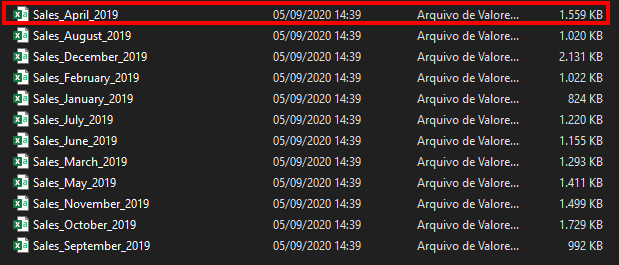

O loop for lerá o arquivo (file = Sales_April_2019) da pasta (files = Sales_Data). Na segunda linha a variável df irá ler o arquivo csv designado (...pd.read_csv( "./Sales_Data/"+file (=Sales_April_2019) ) )

Na terceira linha a variável all_months_data irá concatenar (unir) o que foi armazenado na variável df (linha anterior = Sales_April_2019). 

In [6]:
#Se quiser conferir:

all_months_data.to_csv("all_data.csv", index=False)

all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Limpando os dados antes de trabalhar

Excluindo dados vazios

In [7]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head(10000)

all_data = all_data.dropna(how="any")
nan_df.head(10000)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


A maioria das colunas é do tipo object, tem que converter

#### Pergunta 1: Qual foi o melhor mês de vendas? Quanto foi ganho?

A ideia é adicionar uma coluna mensal com as vendas

#### Coluna Mês

Primeiro vou adicionar a coluna MÊS no data frame. Quero que ele leia os 2 primeiros números da coluna OrderDate, e identifique como mês. Exemplo: 04=Abril

In [9]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [10]:
#Adicionando a coluna Month no df all_data

#A coluna Month receberá os 2 primeiros valores [0:2] da coluna Order Date e converterá para str (string)

all_data["Month"] = all_data["Order Date"].str[0:2]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Convertendo os dados da coluna Month para int32

In [11]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Coluna Sales

Primeiro passo é converter a coluna Price Each e Quantity Ordered para formato numérico int, e depois multiplicar os valores na coluna Sales

In [12]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Voltando para a pergunta 1: Qual foi o melhor mês de vendas e qual foi o valor?

Vamos agrupar a coluna Month e somar os valores por meses

In [13]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Assim, podemos concluir que o melhor mês de venda foi: Dezembro

O melhor jeito de ver esse resultado é plotando em um gráfico

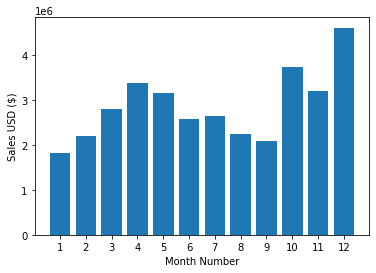

In [14]:
import matplotlib.pyplot as plt

months = range(1,13)  #A variável meses pega os valores de 1 à 12 para plotar no gráfico

results = all_data.groupby("Month").sum() #Os resultados são as somas mensais

plt.bar(months, results["Sales"]) #O plot é com os resultados mas da coluna Sales

#Ajeitando o gráfico:

plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales USD ($)")
plt.show()

#### Mês com maior número de vendas: Dezembro

#### Pergunta 2: Qual cidade teve o maior número de vendas?

Agora vou criar uma coluna com apenas os nomes das cidades em que houve alguma venda

O nome das cidades estão no meio das vírgulas que separam os endereços. O ideal é filtrar o nome da cidade e criar uma coluna apenas com os nomes das mesmas. Para isso, usa-se a função apply()

In [15]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x:x.split(",")[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Criei a nova coluna City, onde a mesma pega os valores da Purchase Address, e com a função apply realiza uma separação, onde a função lambda é responsável por isso. A mesma pega cada valor (x) e realiza-se um split pelas virgulas, porém como eu quero apenas a palavra do meio (1), esse será o resultado exibido na coluna

O mesmo raciocínio foi feito para criar uma coluna com o Estado de cada cidade

In [18]:
all_data["State"] = all_data["Purchase Address"].apply(lambda x:x.split(",")[2].split(" ")[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


#### Respondendo a pergunta

In [19]:
results_city=all_data.groupby("City").sum()
results_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


Plotando-se o gráfico fica mais fácil a visualização

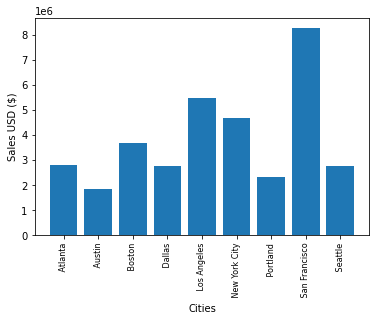

In [26]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby("City")] #Irá pegar cidade por cidade e realizar um groupby dos dados da coluna

plt.bar(cities, results_city["Sales"]) #O plot é com os resultados results_city, mas da coluna Sales

#Ajeitando o gráfico:

plt.xticks(cities, rotation='vertical', size=8) #Colocar o nome das cidades do eixo X na vertical
plt.xlabel("Cities")
plt.ylabel("Sales USD ($)")
plt.show()

#### Cidade com maior número de vendas: San Francisco

#### Pergunta 3: Qual foi o produto mais vendido, e o mais rentável?

In [28]:
results_product=all_data.groupby("Product").sum()
results_product

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


#### Rentável

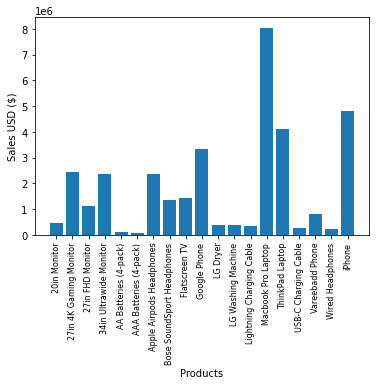

In [31]:
products = [product for product, df in all_data.groupby("Product")] 

plt.bar(products, results_product["Sales"])

plt.xticks(products, rotation='vertical', size=8)
plt.xlabel("Products")
plt.ylabel("Sales USD ($)")
plt.show()

#### Produto mais rentável: MacBook Pro Laptop

#### Produto mais vendido

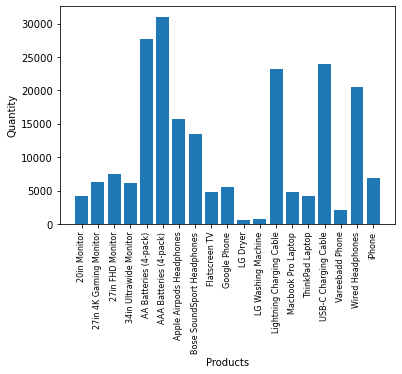

In [32]:
products = [product for product, df in all_data.groupby("Product")] 

plt.bar(products, results_product["Quantity Ordered"])

plt.xticks(products, rotation='vertical', size=8)
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.show()

In [41]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


####  Produto mais vendido: AAA Bateries (4-Pack)

Adicionando a média de venda dos produtos no gráfico de produtos mais vendidos (eixo y segundário)

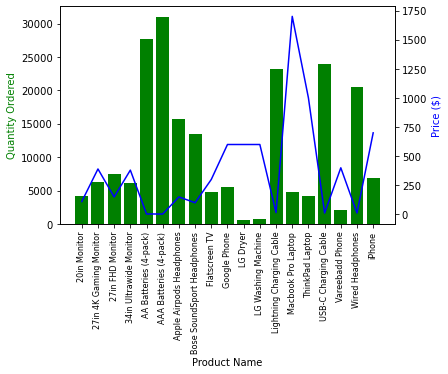

In [46]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

#### Pergunta 4: Em que momento deve-se executar os anúncios para maximizar as vendas?

Essa questão já envolve o entendimento de qual é o melhor horário do dia para que se possa lançar campanhas de promoção ou ofertas de produtos. O ideal é analisar o horário de pico de venda dos últimos meses para tomar uma decisão 

Vou converter agora a coluna de Order Date para datetime

In [33]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [35]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


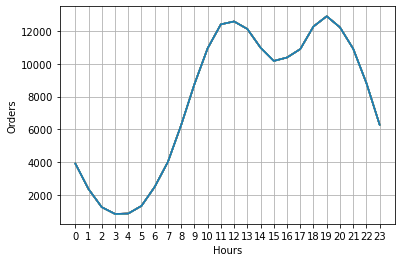

In [40]:
hours = [hour for hour, df in all_data.groupby("Hour")] 
hours_count=all_data.groupby(["Hour"]).count()

plt.plot(hours, hours_count)

plt.xticks(hours) 
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Orders")
plt.show()

#### O horário pico de vendas está entre 11h  e 19h 

#### Conclusão

O melhor mês de venda foi o de Dezembro

A cidade com maior volume de vendas foi: San Francisco

O produto mais vendido foi: AAA Bateries (4-pack), e o mais rentável MacBook Pro laptop

O pico de horário de vendas está entre 11h e 19h, e nesses horários são os ideias para lançar campanhas de promoções, e ofertas.